In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MLP:
    def __init__(self, input_layer =2, hidden_layer = 2, output_layer= 1):
        self.w1 = np.random.randn(input_layer,hidden_layer)
        # self.b1 = np.zeros((1,hidden_layer))
        self.b1 = np.random.randn(1,hidden_layer)
        self.w2 = np.random.randn(hidden_layer,output_layer)
        # self.b2 = np.zeros((1,output_layer))
        self.b2 = np.random.randn(1,output_layer) 
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def sigmoid_derivative(self, a):
        return a * (1 - a)
    
    def forward(self, X):
        self.z1 = np.dot(X,self.w1)+self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2)+self.b2
        self.y_pred = self.sigmoid(self.z2)

        return self.y_pred    
    
    def back_prop(self, X, y, learning_rate):
        output_error_derv = 2*(self.y_pred-y)
        output_delta_error = output_error_derv * self.sigmoid_derivative(self.y_pred)
        hidden_error_derv = np.dot(output_delta_error, self.w2.T)
        hidden_delta_error = hidden_error_derv * self.sigmoid_derivative(self.a1)
        #update trainable Prams
        self.w2 -= learning_rate * np.dot(self.a1.T, output_delta_error)
        self.b2 -= learning_rate * np.sum(output_delta_error, axis=0, keepdims=True)
        self.w1 -= learning_rate * np.dot(X.T, hidden_delta_error)
        self.b1 -= learning_rate * np.sum(hidden_delta_error, axis=0, keepdims=True)

    def fit_batch_gradient_descent(self,x,y,learning_rate= 0.01, epochs = 1000):
        for _ in range(epochs):
            self.forward(X=x)
            self.back_prop(X=x, y=y, learning_rate=learning_rate)

    def fit_sgd(self,x,y,learning_rate = 0.01, epochs = 1000):
        for _ in range(epochs):
            indices = np.arange(len(x))
            np.random.shuffle(indices)
            for i in indices:
                self.forward(X=x[i:i+1])
                self.back_prop(X=x[i:i+1], y=y[i:i+1], learning_rate=learning_rate)

    def fit_mini_batch_gradient_descent(self,x,y,batch_size=2,epochs = 1000):
        for _ in range(epochs):
            indices = np.arange(len(x))
            np.random.shuffle(indices)
            for i in range(0, len(x), batch_size):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                self.forward(X=x_batch)
                self.back_prop(X=x_batch, y=y_batch, learning_rate=0.01)

Training Accuracy: 100.00%


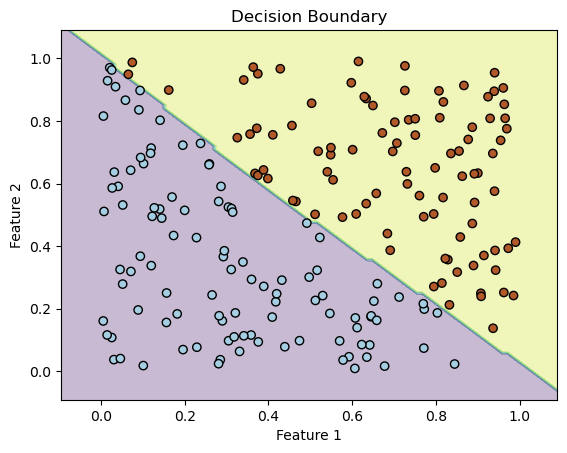

In [4]:
# Generate dummy data for binary classification
np.random.seed(42)
X = np.random.rand(200, 2)  # 200 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int).reshape(-1, 1)  # XOR-like problem

# Initialize the MLP
mlp = MLP(input_layer=2, hidden_layer=4, output_layer=1)

# Train the MLP using batch gradient descent
mlp.fit_batch_gradient_descent(X, y, learning_rate=0.1, epochs=5000)

# Predict
y_pred = mlp.forward(X)
y_pred_labels = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred_labels == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(mlp, X, y)
